# Plugged In 15 Min

In [75]:
import pandas as pd

df_org = pd.read_csv('datasets/first_tier_data_set.csv')
df_org['start_time'] = pd.to_datetime(df_org['start_time'])
df_org['end_time'] = pd.to_datetime(df_org['end_time'])


start_time = df_org.start_time.min().floor('15min')
end_time = df_org.end_time.max().floor('15min')

index = pd.date_range(start=start_time, end=end_time, freq='15T')

df = pd.DataFrame(index=index, columns=['device_1', 'device_2', 'device_3', 'device_4', 'device_5', 'device_6', 'device_7'])
df[:] = False




for i, row in df_org.iterrows():
    start = row['start_time'].round('15min')
    end = row['end_time'].round('15min')
    device_id = row['device_id']

    df.loc[start:end, f"device_{device_id}"] = True

pd.set_option('display.max_rows', 100)
df.head(100)
df.to_csv('plugged_in_15_min.csv')

In [108]:
import pandas as pd

df_org = pd.read_csv('datasets/first_tier_data_set.csv')
df_org['start_time'] = pd.to_datetime(df_org['start_time'])
df_org['end_time'] = pd.to_datetime(df_org['end_time'])

df_prices = pd.read_csv('datasets/first_tier_prices_actual.csv')
df_prices['datetime_utc'] = pd.to_datetime(df_prices['datetime_utc'])
df_prices.set_index('datetime_utc', inplace=True)


start_time = df_org.start_time.min().floor('15min')
end_time = df_org.end_time.max().floor('15min')

df_new = pd.DataFrame(columns=['start', 'n_intervals', 'device_id', 'prices'])

for i, row in df_org.iterrows():
    
    data = {}
    data['start'] = row['start_time'].round('15min')
    data['n_intervals'] = (row['end_time'].round('15min') - row['start_time'].round('15min')).seconds // 900
    data["device_id"] = row['device_id']
    
    data['prices'] = list(df_prices.loc[data['start']:row['end_time'].round('15min'), 'energy_costs_ct_per_kWh'])

    df_new.loc[i] = data

df_new.to_csv('fabian.csv')

# 

In [98]:
import pandas as pd

df_org = pd.read_csv('datasets/first_tier_data_set.csv')
df_org['start_time'] = pd.to_datetime(df_org['start_time'])
df_org['end_time'] = pd.to_datetime(df_org['end_time'])


start_time = df_org.start_time.min().floor('15min')
end_time = df_org.end_time.max().floor('15min')

index = pd.date_range(start=start_time, end=end_time, freq='15min')

col_names_plugged_in = {f"device_{i}_plugged_in":bool for i in range(1, 8)}
col_names_kWh_charged = {f"device_{i}_kWh_charged":float for i in range(1, 8)}


df = pd.DataFrame(index=index, dtype=col_names_plugged_in.update(col_names_kWh_charged))
df[list(col_names_plugged_in.keys())] = False
df[list(col_names_kWh_charged.keys())] = 0.0




for i, row in df_org.iterrows():
    start = row['start_time'].round('15min')
    end = row['end_time'].round('15min')
    
    device_id = row['device_id']
    kWh_charged = row['kWh_charged']

    num_intervals = (end - start).seconds / 60 / 15

    if num_intervals == 0:
        num_intervals = 1

    df.loc[start:end, f"device_{device_id}_plugged_in"] = True
    df.loc[start:end, f"device_{device_id}_kWh_charged"] = (kWh_charged / num_intervals)




pd.set_option('display.max_rows', 100)
df.head(100)
df.to_csv('plugged_in_15_min2.csv')

In [73]:
for col in col_names_kWh_charged.keys():

    sum = df[col].sum()
    print(f"{col}: {sum:.2f}")

device_1_kWh_charged: 2812.35
device_2_kWh_charged: 5902.30
device_3_kWh_charged: 6027.26
device_4_kWh_charged: 165.96
device_5_kWh_charged: 878.90
device_6_kWh_charged: 1586.77
device_7_kWh_charged: 1331.19


In [74]:
df_org.groupby('device_id')['kWh_charged'].sum()

device_id
1    2653.119755
2    3867.058799
3    1278.714737
4     161.175438
5     532.026328
6    1061.144400
7     976.073102
Name: kWh_charged, dtype: float64

In [81]:
def check_doubles(df):
    # Überlappende Zeiträume finden
    overlapping_rows = []

    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if (df.loc[i, 'start_time'] <= df.loc[j, 'end_time']) and (df.loc[j, 'start_time'] <= df.loc[i, 'end_time']):
                overlapping_rows.append((df.loc[i], df.loc[j]))

    # Ausgeben der überlappenden Zeilen
    if overlapping_rows:
        print("Überlappende Zeiträume gefunden:")
        for pair in overlapping_rows:
            print(f"Zeile {pair[0]} und Zeile {pair[1]}")
    else:
        print("Keine überlappenden Zeiträume gefunden.")

    return overlapping_rows

In [80]:
for h in range(1, 8):
    df_device = df_org[df_org['device_id'] == h]
    a = check_doubles(df_device)
    print(a)

KeyError: 16

<Axes: >

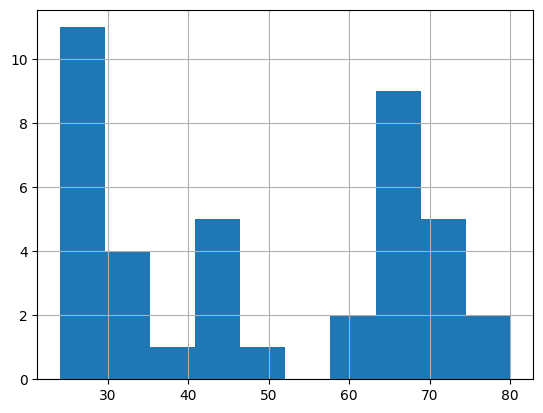

In [93]:
df_org = pd.read_csv('datasets/first_tier_data_set.csv')
df_org['start_time'] = pd.to_datetime(df_org['start_time'])
df_org['end_time'] = pd.to_datetime(df_org['end_time'])

df_org['duration_h'] = (df_org['end_time'] - df_org['start_time']).dt.total_seconds() / 60 / 60
df_org[['duration_h', 'min_charge_mW']].corr()
df_org[['max_charge_mW', 'max_discharge_mW']].corr()

df_org[df_org['duration_h'] > 24]['duration_h'].hist()

In [97]:
df_org["start_dayname"] = df_org["start_time"].dt.day_name()
df_org[df_org["start_dayname"] == "Wednesday"].count()

device_id                 93
start_time                93
end_time                  93
min_charge_mW             93
max_charge_mW             93
max_discharge_mW          93
kWh_charged               93
charging_efficiency       93
discharging_efficiency    93
duration_h                93
start_dayname             93
dtype: int64